In [30]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
import gudhi as gd
import torch
from utilsTopology import *
from utilsBaricentricNeuralNetwork import *

Diagrama de persistencia: tensor([[1., 2.],
        [0., 3.]])
Persistent entropy aprox (dimension 0):  tensor(0.5623)


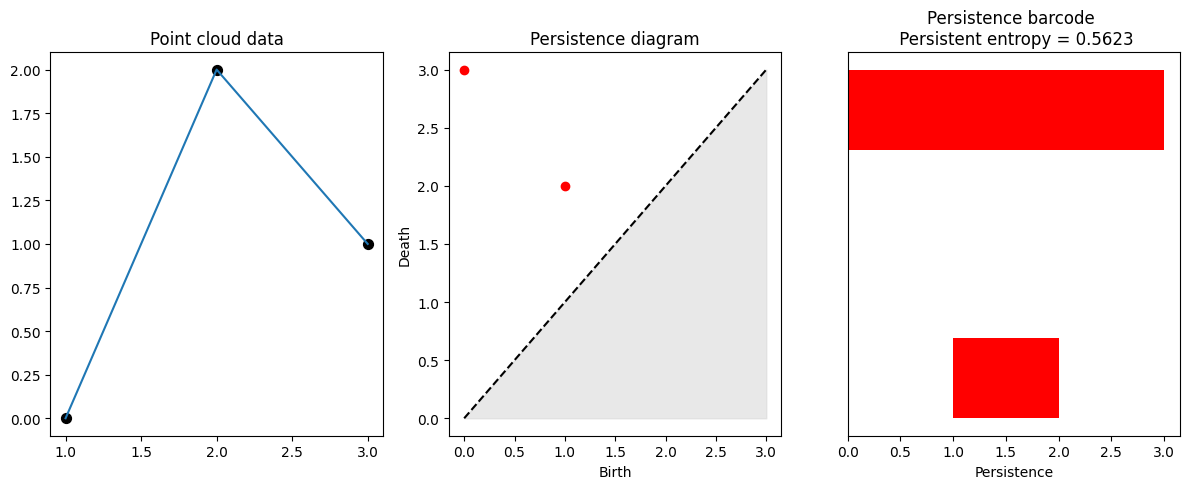

In [42]:
persistence_layer = LowerStarPersistence(maxdim=0)

# Valores de filtración (tensor 1D)
x = torch.tensor([[1.0,0.0], [2.0,2.0], [3.0,1.0]])
max_value = x[:,1].max()
# Calcular el diagrama de persistencia
dgms = persistence_layer(x[:,1])
dgms[dgms==float('inf')] = max_value + 1
print("Diagrama de persistencia:", dgms)

dgmsNumpy = dgms.detach().numpy()
entropia=persistent_entropyTorch(dgms)
print("Persistent entropy aprox (dimension 0): " ,entropia)

# --- Gráfico de diagrama de persistencia ---
plt.figure(figsize=(12, 5))

# Subplot 1: Point cloud
plt.subplot(1, 3, 1)
plt.scatter(x.detach().numpy()[:, 0], x.detach().numpy()[:, 1], c='black', s=50, zorder=2)
plt.plot(x.detach().numpy()[:, 0],x.detach().numpy()[:, 1])
plt.title('Point cloud data')

# Subplot 2: Diagrama de persistencia
plt.subplot(1, 3, 2)
plt.title("Persistence diagram")
plt.scatter(dgmsNumpy[:, 0], dgmsNumpy[:, 1], color="red", label="0")
plt.plot([0, max(dgmsNumpy[:, 1])], [0, max(dgmsNumpy[:, 1])], color="black", linestyle="--")
plt.fill_between([0, max(dgmsNumpy[:, 1])], [0, max(dgmsNumpy[:, 1])], color='lightgray', alpha=0.5)
plt.xlabel("Birth")
plt.ylabel("Death")

# Subplot 3: Código de barras de persistencia
plt.subplot(1, 3, 3)
plt.title(f"Persistence barcode \n Persistent entropy = {round(entropia.item(),4)}")

bar_width = 0.3  # Ancho de las barras
for i, (birth, death) in enumerate(dgmsNumpy):
    plt.barh(i, death - birth, left=birth, color="red", height=bar_width, label="0" if i == 0 else "")

plt.xlabel("Persistence")
plt.yticks([])  # Ocultar etiquetas del eje Y

plt.tight_layout()
plt.savefig('figures/DiagramBarcodeExample.png', dpi=300, bbox_inches='tight')
plt.show()
